# Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [39]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\SAP-4000.csv")

# Project:
## Student Academic Performance & Prediction Analysis

# Data Info

In [40]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [41]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [42]:
df.describe()

,HoursStudied/Week,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000
mean,9.861025,75.224150,71.107775
std,3.713801,14.496906,16.748950
min,0.000000,50.000000,16.600000
25%,7.400000,62.600000,59.300000
50%,9.900000,75.600000,71.550000
75%,12.600000,87.700000,83.500000
max,16.000000,100.000000,100.000000


In [43]:
df.isnull().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

# EDA & Visualization

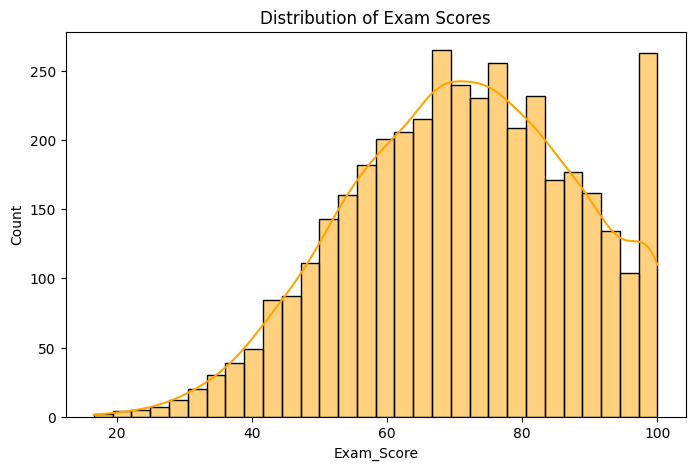

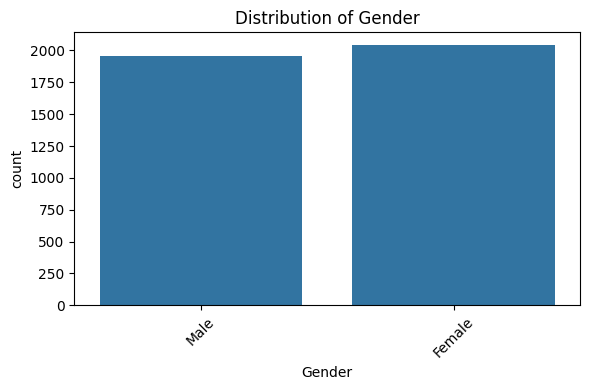

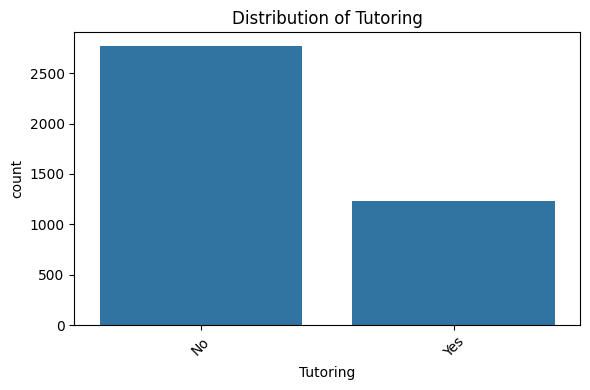

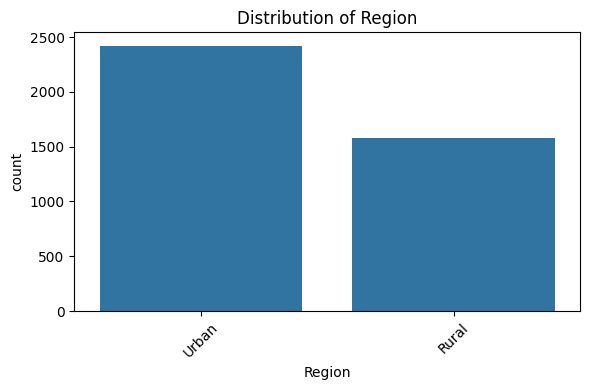

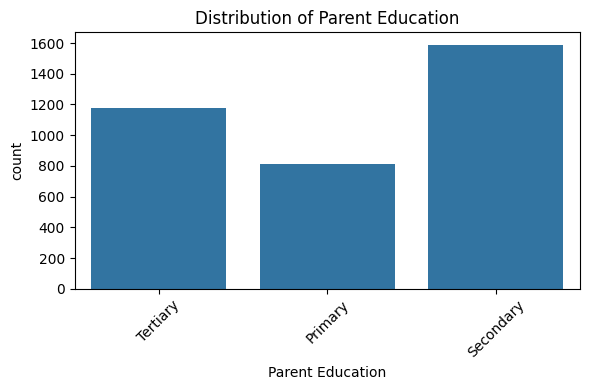

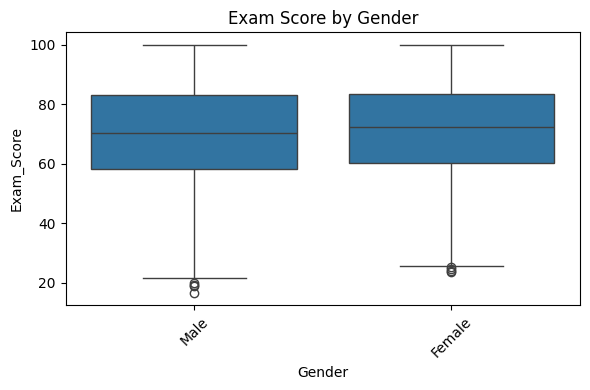

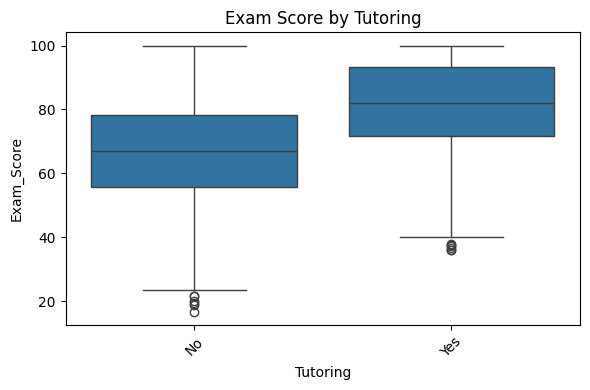

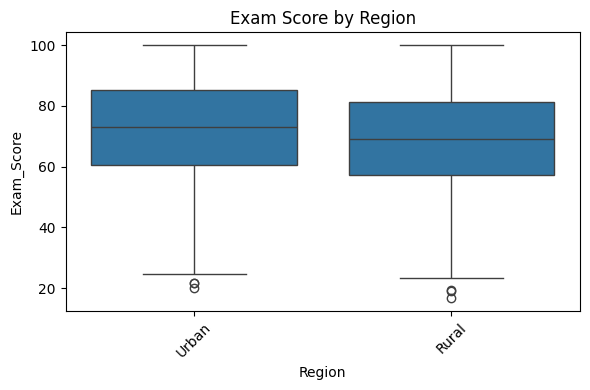

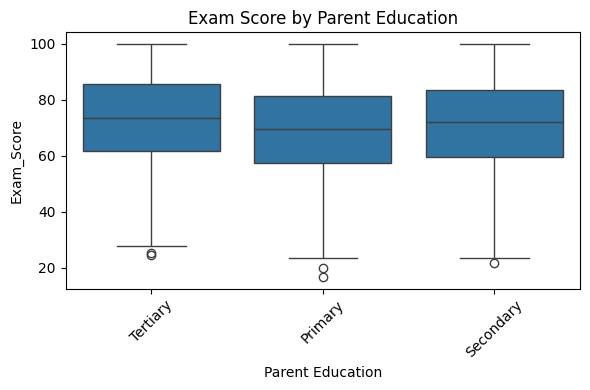

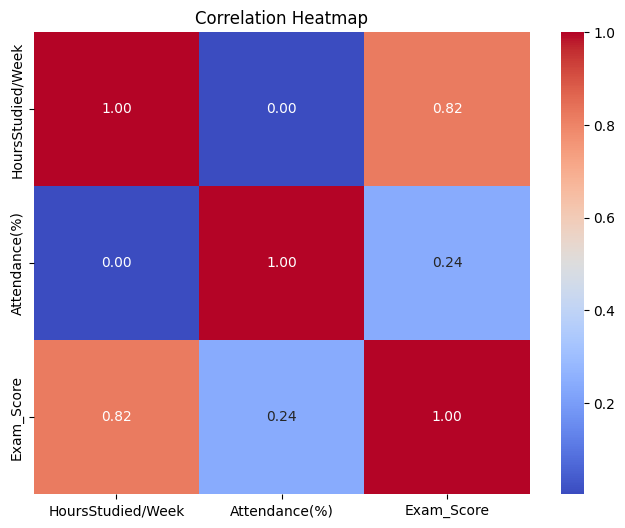

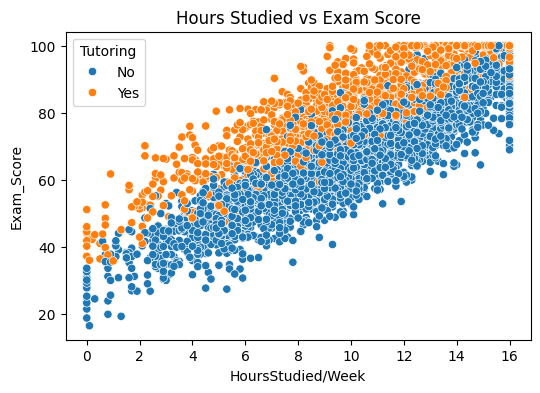

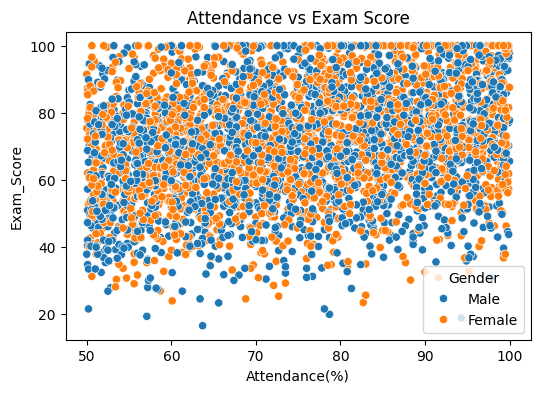

Pearson correlation (HoursStudied/Week, Exam_Score): PearsonRResult(statistic=np.float64(0.8198115984917194), pvalue=np.float64(0.0))
Pearson correlation (Attendance(%), Exam_Score): PearsonRResult(statistic=np.float64(0.2385697428183715), pvalue=np.float64(7.050801727508968e-53))


In [44]:
# Distribution Plots
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam_Score'], kde=True, bins=30, color='orange')
plt.title("Distribution of Exam Scores")
plt.show()

# Categorical Feature Counts
cat_features = ["Gender", "Tutoring", "Region", "Parent Education"]
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Boxplots by Category
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y="Exam_Score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plots for Numerical Variables
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="HoursStudied/Week", y="Exam_Score", hue="Tutoring")
plt.title("Hours Studied vs Exam Score")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Attendance(%)", y="Exam_Score", hue="Gender")
plt.title("Attendance vs Exam Score")
plt.show()

# Pearson Correlations
print("Pearson correlation (HoursStudied/Week, Exam_Score):", pearsonr(df['HoursStudied/Week'], df['Exam_Score']))
print("Pearson correlation (Attendance(%), Exam_Score):", pearsonr(df['Attendance(%)'], df['Exam_Score']))



# Machine Learning

Linear Regression
 R2 Score: 0.9180
 RMSE: 4.95
 Cross-Validated R2: 0.9113

Ridge
 R2 Score: 0.9180
 RMSE: 4.95
 Cross-Validated R2: 0.9113

Lasso
 R2 Score: 0.9173
 RMSE: 4.97
 Cross-Validated R2: 0.9101

Random Forest
 R2 Score: 0.9003
 RMSE: 5.46
 Cross-Validated R2: 0.8950

Gradient Boosting
 R2 Score: 0.9155
 RMSE: 5.03
 Cross-Validated R2: 0.9095



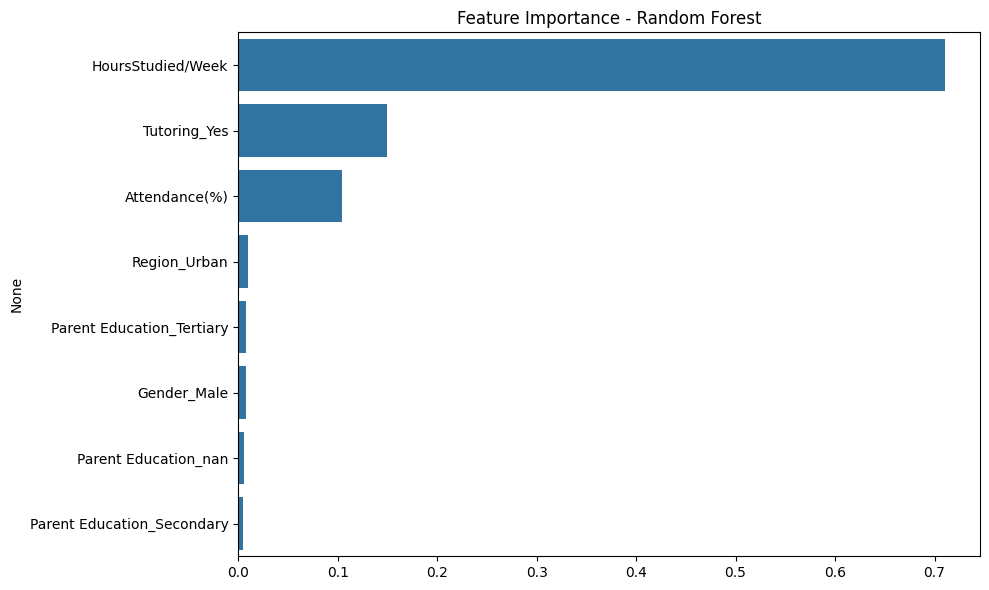

In [45]:
# Feature Preparation
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]
numerical_cols = ["HoursStudied/Week", "Attendance(%)"]
categorical_cols = ["Gender", "Tutoring", "Region", "Parent Education"]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluation Function
def evaluate_model(name, model):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_score = cross_val_score(pipeline, X, y, cv=5, scoring='r2').mean()
    print(f"{name}\n R2 Score: {r2:.4f}\n RMSE: {rmse:.2f}\n Cross-Validated R2: {cv_score:.4f}\n")

# Run Evaluation
for name, model in models.items():
    evaluate_model(name, model)

# Feature Importance from Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_model = rf_pipeline.named_steps["regressor"]
ohe = rf_pipeline.named_steps["preprocessor"].named_transformers_["cat"]
feature_names = numerical_cols + list(ohe.get_feature_names_out(categorical_cols))
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()